<a href="https://colab.research.google.com/github/mlaricobar/datathon-alicorp-2023/blob/main/First%20Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, files

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/'My Drive'/Competiciones/'Alicorp-2023'/

/gdrive/My Drive/Competiciones/Alicorp-2023


In [ ]:
!ls -lh '[00] Data'

total 147M
-rw------- 1 root root  29K Jul 28 18:36 RentabilidadProduct.csv
-rw------- 1 root root  600 Jul 28 18:36 submit_example.csv
-rw------- 1 root root 147M Jul 28 18:36 train.csv


In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv("[00] Data/train.csv", sep="|")

In [ ]:
df_train

,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211
3,2022-01-31,9382,512,BO,21,V,1.0,0.153431,0.005211
4,2022-01-31,9382,525,BO,21,V,1.0,0.153431,0.005790
...,...,...,...,...,...,...,...,...,...
2167843,2023-02-04,646,667,PA,31,B,55.0,2085.986380,796.101767
2167844,2023-02-04,13758,667,PA,31,B,60.0,2339.780728,868.474655
2167845,2023-02-04,3111,673,GA,31,B,64.0,2460.348170,926.372966
2167846,2023-02-04,10520,679,PA,31,B,100.0,3531.912728,1447.457759


## General insights

In [ ]:
df_train.describe()

,customer_id,product_id,business_id,cantidad_venta,monto_venta_transf,peso_venta_transf
count,2.167848e+06,2.167848e+06,2.167848e+06,2.167848e+06,2.167848e+06,2.167848e+06
mean,6.495294e+03,4.327939e+02,3.079470e+01,4.033649e+00,2.678429e+01,4.801825e+00
std,4.130133e+03,3.021948e+02,1.384631e+01,6.993144e+00,1.255970e+02,3.601104e+01
min,1.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,2.315932e-02,2.315932e-03
25%,2.687000e+03,1.720000e+02,2.100000e+01,1.000000e+00,2.055390e+00,1.748529e-01
50%,6.459000e+03,4.110000e+02,2.100000e+01,2.000000e+00,5.352699e+00,6.368814e-01
75%,9.945000e+03,6.830000e+02,5.100000e+01,5.000000e+00,1.384059e+01,2.431729e+00
max,1.531200e+04,1.048000e+03,7.100000e+01,4.800000e+02,1.685446e+04,3.473899e+03


In [ ]:
df_train["monto_venta_transf"].mean(), df_train["monto_venta_transf"].std(), df_train["peso_venta_transf"].mean(), df_train["peso_venta_transf"].std()

(26.784294799525995, 125.59698809913714, 4.801824977950013, 36.01104214277356)

In [ ]:
df_train["customer_id"].nunique()

15312

In [ ]:
df_customer_agg = df_train.groupby("customer_id", as_index=False).agg({"fecha_compra": "count"}).sort_values(by="fecha_compra", ascending=True)

In [ ]:
df_customer_agg.loc[df_customer_agg["fecha_compra"] < 10].shape

(417, 2)

<Axes: >

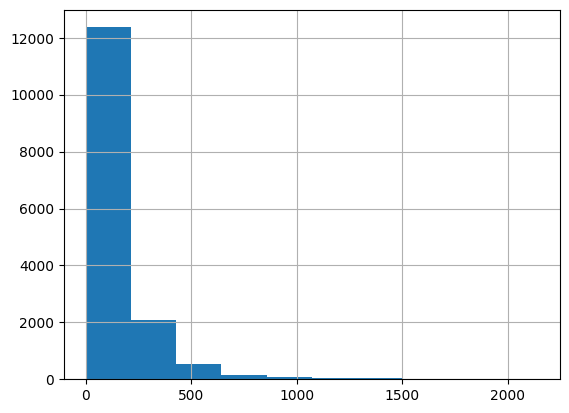

In [ ]:
df_customer_agg["fecha_compra"].hist()

## Date Insights

In [ ]:
df_train['fecha_compra'] = pd.to_datetime(df_train['fecha_compra'], format='%Y-%m-%d')
df_train['dayofweek_compra'] = df_train['fecha_compra'].dt.dayofweek
df_train['dayname_compra'] = df_train['fecha_compra'].dt.day_name()
df_train['weekofyear_compra'] = df_train['fecha_compra'].dt.week
df_train['month_compra'] = df_train['fecha_compra'].dt.month
df_train['year_compra'] = df_train['fecha_compra'].dt.year
df_train['weekofyear_compra'] = df_train.apply(lambda row: "{0}_{1}_{2}".format(row["year_compra"], str(row["month_compra"]).zfill(2), str(row["weekofyear_compra"]).zfill(2)), axis=1)

<ipython-input-14-09b2108d1a3f>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['weekofyear_compra'] = df_train['fecha_compra'].dt.week


In [ ]:
df_week = df_train.groupby(["weekofyear_compra"], as_index=False).agg({"customer_id": "nunique"})
df_week["weeknumber_compra"] = df_week.index + 1
dict_week = {d["weekofyear_compra"]: d["weeknumber_compra"] for d in df_week[["weekofyear_compra", "weeknumber_compra"]].to_dict(orient="records")}
df_week.head()

,weekofyear_compra,customer_id,weeknumber_compra
0,2022_01_05,1248,1
1,2022_02_05,6426,2
2,2022_02_06,7155,3
3,2022_02_07,7165,4
4,2022_02_08,7040,5


In [ ]:
df_train["weeknumber_compra"] = df_train["weekofyear_compra"].map(dict_week)

In [ ]:
df_train

,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf,dayofweek_compra,dayname_compra,weekofyear_compra,month_compra,year_compra,weeknumber_compra
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211,0,Monday,2022_01_05,1,2022,1
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211,0,Monday,2022_01_05,1,2022,1
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211,0,Monday,2022_01_05,1,2022,1
3,2022-01-31,9382,512,BO,21,V,1.0,0.153431,0.005211,0,Monday,2022_01_05,1,2022,1
4,2022-01-31,9382,525,BO,21,V,1.0,0.153431,0.005790,0,Monday,2022_01_05,1,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167843,2023-02-04,646,667,PA,31,B,55.0,2085.986380,796.101767,5,Saturday,2023_02_05,2,2023,63
2167844,2023-02-04,13758,667,PA,31,B,60.0,2339.780728,868.474655,5,Saturday,2023_02_05,2,2023,63
2167845,2023-02-04,3111,673,GA,31,B,64.0,2460.348170,926.372966,5,Saturday,2023_02_05,2,2023,63
2167846,2023-02-04,10520,679,PA,31,B,100.0,3531.912728,1447.457759,5,Saturday,2023_02_05,2,2023,63


In [ ]:
df_train.loc[df_train["weeknumber_compra"] == 63,  "fecha_compra"].min()

Timestamp('2023-02-01 00:00:00')

In [ ]:
df_train.loc[df_train["weeknumber_compra"] == 63,  "fecha_compra"].max()

Timestamp('2023-02-04 00:00:00')

In [ ]:
df_train.groupby(["weeknumber_compra"], as_index=False).agg({"customer_id": "nunique"})

,weeknumber_compra,customer_id
0,1,1248
1,2,6426
2,3,7155
3,4,7165
4,5,7040
...,...,...
58,59,7945
59,60,8244
60,61,7906
61,62,3138


In [ ]:
df_train.loc[df_train["weeknumber_compra"] == 50, "fecha_compra"].unique()

array(['2022-11-14T00:00:00.000000000', '2022-11-15T00:00:00.000000000',
       '2022-11-16T00:00:00.000000000', '2022-11-17T00:00:00.000000000',
       '2022-11-18T00:00:00.000000000', '2022-11-19T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_train.loc[df_train["weeknumber_compra"] == 62, "fecha_compra"].unique()

array(['2023-01-30T00:00:00.000000000', '2023-01-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_train.loc[df_train["weeknumber_compra"] == 63, "customer_id"].unique()

array(['2023-02-01T00:00:00.000000000', '2023-02-02T00:00:00.000000000',
       '2023-02-03T00:00:00.000000000', '2023-02-04T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_train.loc

In [ ]:
df_train.loc[df_train["dayname_compra"] == "Sunday"].head()

,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf,dayofweek_compra,dayname_compra,weekofyear_compra,month_compra
346090,2022-04-03,2495,149,GA,51,V,2.0,26.251094,2.200136,6,Sunday,13,4
834407,2022-06-26,12550,716,GA,31,V,3.0,24.291236,4.168678,6,Sunday,25,6
997439,2022-07-24,11119,77,BO,21,V,1.0,2.243560,0.238541,6,Sunday,29,7
1027386,2022-07-31,1893,227,PA,21,B,5.0,2.304353,0.361864,6,Sunday,30,7
1027387,2022-07-31,1893,228,PA,21,B,5.0,2.304353,0.361864,6,Sunday,30,7


In [ ]:
df_customer_agg = df_train.groupby(["customer_id"], as_index=False).agg({"fecha_compra": ["last", "nunique"], "product_id": "nunique", "cantidad_venta": "sum", "month_compra": "nunique"})
df_customer_agg.columns = ["_".join(c) if c[-1] != "" else c[0] for c in df_customer_agg.columns]

In [ ]:
df_customer_agg.sort_values(by="month_compra_nunique", ascending=True).head(30)

,customer_id,fecha_compra_last,fecha_compra_nunique,product_id_nunique,cantidad_venta_sum,month_compra_nunique
4807,4808,2022-11-22,1,1,5.0,1
5673,5674,2023-01-24,1,3,12.0,1
15136,15137,2022-11-18,1,1,1.0,1
7384,7385,2022-02-11,1,1,50.0,1
15246,15247,2022-12-28,4,11,558.0,1
6020,6021,2022-02-25,1,1,3.0,1
12739,12740,2022-04-29,1,3,4.0,1
15269,15270,2022-12-27,2,9,90.0,1
9987,9988,2022-04-27,1,2,7.0,1
1423,1424,2022-06-20,1,1,10.0,1


In [ ]:
df_customer_agg.groupby("month_compra_nunique", as_index=False).agg({"customer_id": "nunique", "product_id_nunique": "mean", "cantidad_venta_sum": ["mean", "sum"]})

month_compra_nunique customer_id product_id_nunique cantidad_venta_sum  \
                            nunique               mean               mean   
0                     1          41           2.756098          30.512195   
1                     2         112           5.803571          38.714286   
2                     3         251           7.334661          64.187251   
3                     4         368          10.793478          84.807065   
4                     5         439          12.316629         115.382688   
5                     6         519          14.497110         133.233141   
6                     7         626          20.492013         191.337061   
7                     8         762          22.261155         215.450131   
8                     9         901          27.042175         262.804661   
9                    10        1176          29.364796         334.346939   
10                   11        1887          33.045045         364.372019   
11                   12        8230          60.494897         846.917618   

               
          sum  
0      1251.0  
1      4336.0  
2     16111.0  
3     31209.0  
4     50653.0  
5     69148.0  
6    119777.0  
7    164173.0  
8    236787.0  
9    393192.0  
10   687570.0  
11  6970132.0

## Product Insights

In [ ]:
df_train.head(3)

,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf,dayofweek_compra,dayname_compra,weekofyear_compra,month_compra
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211,0,Monday,5,1
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211,0,Monday,5,1
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211,0,Monday,5,1


In [ ]:
df_train["product_id"].nunique()

1043

In [ ]:
df_producto_agg = df_train.groupby(["product_id"], as_index=False).agg({"customer_id": "nunique", "cantidad_venta": "sum", "month_compra": "nunique"}).sort_values(by="customer_id", ascending=False)

In [ ]:
df_producto_agg.head(30)

,product_id,customer_id,cantidad_venta,month_compra
734,739,7151,58481.0,12
767,772,6398,77999.0,12
118,119,5670,616140.0,12
967,973,5041,122906.0,12
65,66,4889,118895.0,12
201,203,4572,92886.0,12
806,812,4308,14881.0,12
981,987,4240,151107.0,12
192,194,4215,42933.0,12
119,120,4212,112585.0,12


## Customer Insights

In [ ]:
df_train

,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf,dayofweek_compra,dayname_compra,weekofyear_compra,month_compra
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211,0,Monday,5,1
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211,0,Monday,5,1
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211,0,Monday,5,1
3,2022-01-31,9382,512,BO,21,V,1.0,0.153431,0.005211,0,Monday,5,1
4,2022-01-31,9382,525,BO,21,V,1.0,0.153431,0.005790,0,Monday,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167843,2023-02-04,646,667,PA,31,B,55.0,2085.986380,796.101767,5,Saturday,5,2
2167844,2023-02-04,13758,667,PA,31,B,60.0,2339.780728,868.474655,5,Saturday,5,2
2167845,2023-02-04,3111,673,GA,31,B,64.0,2460.348170,926.372966,5,Saturday,5,2
2167846,2023-02-04,10520,679,PA,31,B,100.0,3531.912728,1447.457759,5,Saturday,5,2


In [ ]:
df_train.loc[df_train[""]]

In [ ]:
df_train.groupby(["month_compra", "weekofyear_compra", "dayofweek_compra", "dayname_compra", "fecha_compra"], as_index=False).agg({"customer_id": "nunique"}).head(30)

,month_compra,weekofyear_compra,dayofweek_compra,dayname_compra,fecha_compra,customer_id
0,1,1,0,Monday,2023-01-02,1392
1,1,1,1,Tuesday,2023-01-03,1442
2,1,1,2,Wednesday,2023-01-04,1665
3,1,1,3,Thursday,2023-01-05,1648
4,1,1,4,Friday,2023-01-06,1578
5,1,1,5,Saturday,2023-01-07,1542
6,1,2,0,Monday,2023-01-09,1617
7,1,2,1,Tuesday,2023-01-10,1584
8,1,2,2,Wednesday,2023-01-11,1613
9,1,2,3,Thursday,2023-01-12,1618


In [ ]:
df_train["fecha_compra"].min(), df_train["fecha_compra"].max()

('2022-01-31', '2023-02-04')

In [ ]:
df_train.groupby("fecha_compra", as_index=False).agg({"customer_id": "nunique",
                                                      "product_id": "nunique"
                                                      }).sort_values(by="fecha_compra", ascending=False).head(40)

,fecha_compra,customer_id,product_id
326,2023-02-04,1589,491
325,2023-02-03,1653,498
324,2023-02-02,1680,480
323,2023-02-01,1593,502
322,2023-01-31,1537,461
321,2023-01-30,1611,502
320,2023-01-28,1485,459
319,2023-01-27,1596,488
318,2023-01-26,1608,478
317,2023-01-25,1650,470


In [ ]:
df_submit = pd.read_csv("[00] Data/submit_example.csv", sep=",")

In [ ]:
df_submit

,customer_id,product_id
0,1,10 15 70 30 77 890 194 88 915 926 1028 190 452...
1,2,5 9 70 456 414 404 452 194 119 190 890 406 116...
2,3,80 2 7 452 456 116 404 414 77 890 194 406 926 ...
3,4,600 400 1 12 404 414 406 203 116 77 459 890 42...
4,5,70 60 20 56 119 81 328 972 495 174 813 37 801 ...


In [ ]:
df_submit["customer_id"].nunique()

5